## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1          X2        X3        X4         Y
0  30.487009  971.215069  0.721412  2.737027  1.457730
1  92.828596  989.345031  0.005475  7.246291  0.027626
2  72.545421  713.298387  0.914277  7.958299  1.416082
3  69.024663  288.374316  0.856489  6.773381  1.184363
4  23.215472  321.207646  0.244163  7.858464  1.255323


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.42385 | train_mse: 4.21196 | train_mae: 1.46378 |  0:00:00s
epoch 1  | loss: 1.14895 | train_mse: 3.27671 | train_mae: 1.32075 |  0:00:00s
epoch 2  | loss: 1.04085 | train_mse: 3.02303 | train_mae: 1.26073 |  0:00:00s


epoch 3  | loss: 0.96411 | train_mse: 2.64633 | train_mae: 1.19129 |  0:00:00s
epoch 4  | loss: 1.03429 | train_mse: 2.31365 | train_mae: 1.11162 |  0:00:00s


epoch 5  | loss: 1.04178 | train_mse: 2.03721 | train_mae: 1.04421 |  0:00:00s
epoch 6  | loss: 1.0073  | train_mse: 1.83592 | train_mae: 0.98727 |  0:00:00s


epoch 7  | loss: 0.88813 | train_mse: 1.67505 | train_mae: 0.9365  |  0:00:01s
epoch 8  | loss: 0.79078 | train_mse: 1.46302 | train_mae: 0.86484 |  0:00:01s


epoch 9  | loss: 0.85519 | train_mse: 1.31374 | train_mae: 0.81423 |  0:00:01s
epoch 10 | loss: 0.99894 | train_mse: 1.20554 | train_mae: 0.77482 |  0:00:01s
epoch 11 | loss: 0.79081 | train_mse: 1.11845 | train_mae: 0.7425  |  0:00:01s


epoch 12 | loss: 0.68737 | train_mse: 1.05012 | train_mae: 0.71719 |  0:00:01s
epoch 13 | loss: 0.71369 | train_mse: 0.98987 | train_mae: 0.69315 |  0:00:01s


epoch 14 | loss: 0.73421 | train_mse: 0.92832 | train_mae: 0.66887 |  0:00:01s
epoch 15 | loss: 0.6427  | train_mse: 0.88671 | train_mae: 0.64942 |  0:00:01s
epoch 16 | loss: 0.70631 | train_mse: 0.84739 | train_mae: 0.63047 |  0:00:01s


epoch 17 | loss: 0.55197 | train_mse: 0.81944 | train_mae: 0.61346 |  0:00:02s
epoch 18 | loss: 0.62673 | train_mse: 0.78067 | train_mae: 0.59899 |  0:00:02s


epoch 19 | loss: 0.59663 | train_mse: 0.74195 | train_mae: 0.58012 |  0:00:02s
epoch 20 | loss: 0.67922 | train_mse: 0.71363 | train_mae: 0.56938 |  0:00:02s
epoch 21 | loss: 0.55621 | train_mse: 0.69791 | train_mae: 0.56697 |  0:00:02s


epoch 22 | loss: 0.61153 | train_mse: 0.66776 | train_mae: 0.55714 |  0:00:02s
epoch 23 | loss: 0.63944 | train_mse: 0.6333  | train_mae: 0.53662 |  0:00:02s
epoch 24 | loss: 0.52855 | train_mse: 0.6212  | train_mae: 0.52685 |  0:00:02s


epoch 25 | loss: 0.71661 | train_mse: 0.60311 | train_mae: 0.51673 |  0:00:02s
epoch 26 | loss: 0.59569 | train_mse: 0.59045 | train_mae: 0.51096 |  0:00:02s


epoch 27 | loss: 0.40961 | train_mse: 0.58255 | train_mae: 0.51138 |  0:00:03s
epoch 28 | loss: 0.52804 | train_mse: 0.57144 | train_mae: 0.50591 |  0:00:03s
epoch 29 | loss: 0.54767 | train_mse: 0.54853 | train_mae: 0.4974  |  0:00:03s


epoch 30 | loss: 0.57266 | train_mse: 0.53147 | train_mae: 0.49351 |  0:00:03s
epoch 31 | loss: 0.48743 | train_mse: 0.5235  | train_mae: 0.49259 |  0:00:03s
epoch 32 | loss: 0.43025 | train_mse: 0.48728 | train_mae: 0.47599 |  0:00:03s


epoch 33 | loss: 0.42753 | train_mse: 0.47083 | train_mae: 0.46597 |  0:00:03s
epoch 34 | loss: 0.39313 | train_mse: 0.45596 | train_mae: 0.45496 |  0:00:03s
epoch 35 | loss: 0.38576 | train_mse: 0.44519 | train_mae: 0.44846 |  0:00:03s


epoch 36 | loss: 0.46028 | train_mse: 0.43397 | train_mae: 0.44417 |  0:00:03s
epoch 37 | loss: 0.39862 | train_mse: 0.41594 | train_mae: 0.43285 |  0:00:03s


epoch 38 | loss: 0.46883 | train_mse: 0.40188 | train_mae: 0.42709 |  0:00:04s
epoch 39 | loss: 0.50007 | train_mse: 0.38833 | train_mae: 0.41801 |  0:00:04s
epoch 40 | loss: 0.30886 | train_mse: 0.37263 | train_mae: 0.4074  |  0:00:04s


epoch 41 | loss: 0.41303 | train_mse: 0.35771 | train_mae: 0.39794 |  0:00:04s
epoch 42 | loss: 0.43684 | train_mse: 0.34266 | train_mae: 0.38741 |  0:00:04s
epoch 43 | loss: 0.35682 | train_mse: 0.3325  | train_mae: 0.38264 |  0:00:04s


epoch 44 | loss: 0.37294 | train_mse: 0.32252 | train_mae: 0.37723 |  0:00:04s
epoch 45 | loss: 0.36901 | train_mse: 0.30923 | train_mae: 0.36874 |  0:00:04s
epoch 46 | loss: 0.29779 | train_mse: 0.29735 | train_mae: 0.35966 |  0:00:04s


epoch 47 | loss: 0.30991 | train_mse: 0.29084 | train_mae: 0.3608  |  0:00:04s


epoch 48 | loss: 0.31435 | train_mse: 0.2813  | train_mae: 0.35489 |  0:00:05s
epoch 49 | loss: 0.33779 | train_mse: 0.26939 | train_mae: 0.3474  |  0:00:05s
epoch 50 | loss: 0.36058 | train_mse: 0.26181 | train_mae: 0.34094 |  0:00:05s


epoch 51 | loss: 0.35921 | train_mse: 0.25584 | train_mae: 0.33633 |  0:00:05s
epoch 52 | loss: 0.41844 | train_mse: 0.2521  | train_mae: 0.33638 |  0:00:05s
epoch 53 | loss: 0.3839  | train_mse: 0.25225 | train_mae: 0.33723 |  0:00:05s


epoch 54 | loss: 0.29725 | train_mse: 0.24853 | train_mae: 0.33624 |  0:00:05s
epoch 55 | loss: 0.29803 | train_mse: 0.24647 | train_mae: 0.33254 |  0:00:05s
epoch 56 | loss: 0.33438 | train_mse: 0.2466  | train_mae: 0.33034 |  0:00:05s


epoch 57 | loss: 0.29298 | train_mse: 0.24201 | train_mae: 0.32578 |  0:00:05s
epoch 58 | loss: 0.26964 | train_mse: 0.2325  | train_mae: 0.31611 |  0:00:06s


epoch 59 | loss: 0.51194 | train_mse: 0.22417 | train_mae: 0.3104  |  0:00:06s
epoch 60 | loss: 0.26008 | train_mse: 0.21404 | train_mae: 0.30121 |  0:00:06s
epoch 61 | loss: 0.35126 | train_mse: 0.20683 | train_mae: 0.29732 |  0:00:06s


epoch 62 | loss: 0.19926 | train_mse: 0.20181 | train_mae: 0.29539 |  0:00:06s
epoch 63 | loss: 0.3028  | train_mse: 0.1974  | train_mae: 0.29313 |  0:00:06s
epoch 64 | loss: 0.22478 | train_mse: 0.1917  | train_mae: 0.28976 |  0:00:06s


epoch 65 | loss: 0.29213 | train_mse: 0.18577 | train_mae: 0.28721 |  0:00:06s
epoch 66 | loss: 0.2542  | train_mse: 0.18    | train_mae: 0.28172 |  0:00:06s
epoch 67 | loss: 0.32082 | train_mse: 0.18119 | train_mae: 0.28824 |  0:00:06s


epoch 68 | loss: 0.32934 | train_mse: 0.1774  | train_mae: 0.29055 |  0:00:07s
epoch 69 | loss: 0.19335 | train_mse: 0.1751  | train_mae: 0.29389 |  0:00:07s
epoch 70 | loss: 0.26414 | train_mse: 0.17768 | train_mae: 0.29556 |  0:00:07s


epoch 71 | loss: 0.30252 | train_mse: 0.17709 | train_mae: 0.29264 |  0:00:07s
epoch 72 | loss: 0.2609  | train_mse: 0.17331 | train_mae: 0.28716 |  0:00:07s
epoch 73 | loss: 0.27502 | train_mse: 0.18597 | train_mae: 0.29148 |  0:00:07s


epoch 74 | loss: 0.21753 | train_mse: 0.185   | train_mae: 0.29262 |  0:00:07s
epoch 75 | loss: 0.35204 | train_mse: 0.18608 | train_mae: 0.29353 |  0:00:07s
epoch 76 | loss: 0.36427 | train_mse: 0.16479 | train_mae: 0.27763 |  0:00:07s


epoch 77 | loss: 0.24701 | train_mse: 0.16374 | train_mae: 0.28077 |  0:00:07s
epoch 78 | loss: 0.22429 | train_mse: 0.171   | train_mae: 0.28646 |  0:00:07s


epoch 79 | loss: 0.20001 | train_mse: 0.1675  | train_mae: 0.28572 |  0:00:08s
epoch 80 | loss: 0.28237 | train_mse: 0.17001 | train_mae: 0.28661 |  0:00:08s


epoch 81 | loss: 0.32706 | train_mse: 0.17398 | train_mae: 0.29105 |  0:00:08s
epoch 82 | loss: 0.34363 | train_mse: 0.17297 | train_mae: 0.28902 |  0:00:08s


epoch 83 | loss: 0.27987 | train_mse: 0.16511 | train_mae: 0.28599 |  0:00:08s
epoch 84 | loss: 0.31601 | train_mse: 0.15581 | train_mae: 0.28328 |  0:00:08s


epoch 85 | loss: 0.22658 | train_mse: 0.14999 | train_mae: 0.28167 |  0:00:08s
epoch 86 | loss: 0.37662 | train_mse: 0.14482 | train_mae: 0.27821 |  0:00:08s


epoch 87 | loss: 0.3082  | train_mse: 0.14244 | train_mae: 0.27773 |  0:00:09s
epoch 88 | loss: 0.41827 | train_mse: 0.14128 | train_mae: 0.27958 |  0:00:09s


epoch 89 | loss: 0.36166 | train_mse: 0.14528 | train_mae: 0.284   |  0:00:09s
epoch 90 | loss: 0.24536 | train_mse: 0.14554 | train_mae: 0.28391 |  0:00:09s
epoch 91 | loss: 0.33117 | train_mse: 0.14827 | train_mae: 0.28697 |  0:00:09s


epoch 92 | loss: 0.33757 | train_mse: 0.1454  | train_mae: 0.28488 |  0:00:09s
epoch 93 | loss: 0.35915 | train_mse: 0.14067 | train_mae: 0.27826 |  0:00:09s
epoch 94 | loss: 0.26198 | train_mse: 0.13553 | train_mae: 0.26884 |  0:00:09s


epoch 95 | loss: 0.20087 | train_mse: 0.13549 | train_mae: 0.26901 |  0:00:09s
epoch 96 | loss: 0.37936 | train_mse: 0.13816 | train_mae: 0.27008 |  0:00:09s
epoch 97 | loss: 0.27526 | train_mse: 0.14139 | train_mae: 0.27081 |  0:00:10s


epoch 98 | loss: 0.20414 | train_mse: 0.14235 | train_mae: 0.27415 |  0:00:10s
epoch 99 | loss: 0.23802 | train_mse: 0.14833 | train_mae: 0.28245 |  0:00:10s


epoch 100| loss: 0.28036 | train_mse: 0.1559  | train_mae: 0.2889  |  0:00:10s
epoch 101| loss: 0.20104 | train_mse: 0.14995 | train_mae: 0.28522 |  0:00:10s
epoch 102| loss: 0.18208 | train_mse: 0.147   | train_mae: 0.27961 |  0:00:10s


epoch 103| loss: 0.25724 | train_mse: 0.14351 | train_mae: 0.27322 |  0:00:10s
epoch 104| loss: 0.2031  | train_mse: 0.14298 | train_mae: 0.27151 |  0:00:10s
epoch 105| loss: 0.28987 | train_mse: 0.14246 | train_mae: 0.27146 |  0:00:10s


epoch 106| loss: 0.25524 | train_mse: 0.14403 | train_mae: 0.27457 |  0:00:10s
epoch 107| loss: 0.18732 | train_mse: 0.144   | train_mae: 0.27281 |  0:00:11s
epoch 108| loss: 0.31216 | train_mse: 0.14161 | train_mae: 0.27234 |  0:00:11s


epoch 109| loss: 0.22461 | train_mse: 0.13649 | train_mae: 0.27126 |  0:00:11s
epoch 110| loss: 0.30564 | train_mse: 0.13631 | train_mae: 0.27125 |  0:00:11s
epoch 111| loss: 0.23466 | train_mse: 0.13953 | train_mae: 0.27217 |  0:00:11s


epoch 112| loss: 0.24952 | train_mse: 0.14104 | train_mae: 0.26977 |  0:00:11s
epoch 113| loss: 0.22456 | train_mse: 0.13658 | train_mae: 0.26869 |  0:00:11s
epoch 114| loss: 0.32106 | train_mse: 0.13294 | train_mae: 0.26545 |  0:00:11s


epoch 115| loss: 0.21032 | train_mse: 0.13452 | train_mae: 0.26602 |  0:00:11s
epoch 116| loss: 0.22801 | train_mse: 0.13349 | train_mae: 0.26255 |  0:00:11s


epoch 117| loss: 0.17127 | train_mse: 0.13173 | train_mae: 0.26107 |  0:00:12s
epoch 118| loss: 0.27616 | train_mse: 0.13014 | train_mae: 0.25973 |  0:00:12s
epoch 119| loss: 0.29741 | train_mse: 0.12839 | train_mae: 0.25609 |  0:00:12s


epoch 120| loss: 0.1461  | train_mse: 0.12481 | train_mae: 0.24919 |  0:00:12s
epoch 121| loss: 0.15076 | train_mse: 0.12284 | train_mae: 0.24206 |  0:00:12s
epoch 122| loss: 0.202   | train_mse: 0.12083 | train_mae: 0.23992 |  0:00:12s


epoch 123| loss: 0.19488 | train_mse: 0.12264 | train_mae: 0.24045 |  0:00:12s
epoch 124| loss: 0.17501 | train_mse: 0.12218 | train_mae: 0.24129 |  0:00:12s
epoch 125| loss: 0.20276 | train_mse: 0.12021 | train_mae: 0.24097 |  0:00:12s


epoch 126| loss: 0.19221 | train_mse: 0.12131 | train_mae: 0.24563 |  0:00:12s
epoch 127| loss: 0.20225 | train_mse: 0.12282 | train_mae: 0.24564 |  0:00:12s


epoch 128| loss: 0.17225 | train_mse: 0.12778 | train_mae: 0.25045 |  0:00:13s
epoch 129| loss: 0.28068 | train_mse: 0.12223 | train_mae: 0.24879 |  0:00:13s
epoch 130| loss: 0.19538 | train_mse: 0.11767 | train_mae: 0.24322 |  0:00:13s


epoch 131| loss: 0.17696 | train_mse: 0.11387 | train_mae: 0.24412 |  0:00:13s
epoch 132| loss: 0.23574 | train_mse: 0.11175 | train_mae: 0.2458  |  0:00:13s
epoch 133| loss: 0.21845 | train_mse: 0.10636 | train_mae: 0.24275 |  0:00:13s


epoch 134| loss: 0.17717 | train_mse: 0.09725 | train_mae: 0.23439 |  0:00:13s
epoch 135| loss: 0.21166 | train_mse: 0.09654 | train_mae: 0.23397 |  0:00:13s
epoch 136| loss: 0.12073 | train_mse: 0.09743 | train_mae: 0.23485 |  0:00:13s


epoch 137| loss: 0.19273 | train_mse: 0.09137 | train_mae: 0.22814 |  0:00:13s
epoch 138| loss: 0.24619 | train_mse: 0.08837 | train_mae: 0.22317 |  0:00:14s


epoch 139| loss: 0.20796 | train_mse: 0.09018 | train_mae: 0.22411 |  0:00:14s
epoch 140| loss: 0.37176 | train_mse: 0.08953 | train_mae: 0.22229 |  0:00:14s
epoch 141| loss: 0.17601 | train_mse: 0.09438 | train_mae: 0.22198 |  0:00:14s


epoch 142| loss: 0.18591 | train_mse: 0.11079 | train_mae: 0.22915 |  0:00:14s
epoch 143| loss: 0.26339 | train_mse: 0.12087 | train_mae: 0.23789 |  0:00:14s
epoch 144| loss: 0.21013 | train_mse: 0.13185 | train_mae: 0.24719 |  0:00:14s


epoch 145| loss: 0.27446 | train_mse: 0.13583 | train_mae: 0.25091 |  0:00:14s
epoch 146| loss: 0.16447 | train_mse: 0.13135 | train_mae: 0.25166 |  0:00:14s
epoch 147| loss: 0.32941 | train_mse: 0.12303 | train_mae: 0.24723 |  0:00:14s


epoch 148| loss: 0.12751 | train_mse: 0.10478 | train_mae: 0.23514 |  0:00:14s
epoch 149| loss: 0.21039 | train_mse: 0.09893 | train_mae: 0.22991 |  0:00:15s


epoch 150| loss: 0.19172 | train_mse: 0.09148 | train_mae: 0.22536 |  0:00:15s
epoch 151| loss: 0.14921 | train_mse: 0.09083 | train_mae: 0.22839 |  0:00:15s
epoch 152| loss: 0.23068 | train_mse: 0.09556 | train_mae: 0.23181 |  0:00:15s


epoch 153| loss: 0.27654 | train_mse: 0.10308 | train_mae: 0.23138 |  0:00:15s
epoch 154| loss: 0.21828 | train_mse: 0.08649 | train_mae: 0.22551 |  0:00:15s
epoch 155| loss: 0.14387 | train_mse: 0.08067 | train_mae: 0.22141 |  0:00:15s


epoch 156| loss: 0.16305 | train_mse: 0.07744 | train_mae: 0.21976 |  0:00:15s
epoch 157| loss: 0.28077 | train_mse: 0.07627 | train_mae: 0.21761 |  0:00:15s
epoch 158| loss: 0.22195 | train_mse: 0.07158 | train_mae: 0.21275 |  0:00:15s


epoch 159| loss: 0.15031 | train_mse: 0.07087 | train_mae: 0.21193 |  0:00:16s
epoch 160| loss: 0.13888 | train_mse: 0.0733  | train_mae: 0.21428 |  0:00:16s
epoch 161| loss: 0.19814 | train_mse: 0.08291 | train_mae: 0.21751 |  0:00:16s


epoch 162| loss: 0.19294 | train_mse: 0.09383 | train_mae: 0.22222 |  0:00:16s
epoch 163| loss: 0.39057 | train_mse: 0.07925 | train_mae: 0.21381 |  0:00:16s


epoch 164| loss: 0.28338 | train_mse: 0.07622 | train_mae: 0.21187 |  0:00:16s
epoch 165| loss: 0.16176 | train_mse: 0.07522 | train_mae: 0.20875 |  0:00:16s
epoch 166| loss: 0.17355 | train_mse: 0.07597 | train_mae: 0.2074  |  0:00:16s


epoch 167| loss: 0.18128 | train_mse: 0.08559 | train_mae: 0.21574 |  0:00:16s
epoch 168| loss: 0.18907 | train_mse: 0.08242 | train_mae: 0.21441 |  0:00:16s
epoch 169| loss: 0.21351 | train_mse: 0.0876  | train_mae: 0.22053 |  0:00:16s


epoch 170| loss: 0.11754 | train_mse: 0.10028 | train_mae: 0.22852 |  0:00:17s
epoch 171| loss: 0.24349 | train_mse: 0.09843 | train_mae: 0.22803 |  0:00:17s
epoch 172| loss: 0.17682 | train_mse: 0.09177 | train_mae: 0.22891 |  0:00:17s


epoch 173| loss: 0.1607  | train_mse: 0.09198 | train_mae: 0.22702 |  0:00:17s
epoch 174| loss: 0.16026 | train_mse: 0.09297 | train_mae: 0.22935 |  0:00:17s
epoch 175| loss: 0.16726 | train_mse: 0.0968  | train_mae: 0.22895 |  0:00:17s


epoch 176| loss: 0.21112 | train_mse: 0.10011 | train_mae: 0.22879 |  0:00:17s
epoch 177| loss: 0.36905 | train_mse: 0.09877 | train_mae: 0.21754 |  0:00:17s
epoch 178| loss: 0.22147 | train_mse: 0.09237 | train_mae: 0.21739 |  0:00:17s


epoch 179| loss: 0.19036 | train_mse: 0.07927 | train_mae: 0.20775 |  0:00:17s
epoch 180| loss: 0.1135  | train_mse: 0.08325 | train_mae: 0.20943 |  0:00:17s


epoch 181| loss: 0.13666 | train_mse: 0.08846 | train_mae: 0.21494 |  0:00:18s
epoch 182| loss: 0.18074 | train_mse: 0.08611 | train_mae: 0.21301 |  0:00:18s
epoch 183| loss: 0.13732 | train_mse: 0.08094 | train_mae: 0.20528 |  0:00:18s


epoch 184| loss: 0.19294 | train_mse: 0.0741  | train_mae: 0.19678 |  0:00:18s
epoch 185| loss: 0.27562 | train_mse: 0.07693 | train_mae: 0.19882 |  0:00:18s
epoch 186| loss: 0.39972 | train_mse: 0.07786 | train_mae: 0.20094 |  0:00:18s


epoch 187| loss: 0.21195 | train_mse: 0.07737 | train_mae: 0.20194 |  0:00:18s
epoch 188| loss: 0.2486  | train_mse: 0.07545 | train_mae: 0.20066 |  0:00:18s
epoch 189| loss: 0.21047 | train_mse: 0.07714 | train_mae: 0.20283 |  0:00:18s


epoch 190| loss: 0.17755 | train_mse: 0.08053 | train_mae: 0.20536 |  0:00:18s
epoch 191| loss: 0.09895 | train_mse: 0.0783  | train_mae: 0.20361 |  0:00:18s


epoch 192| loss: 0.2791  | train_mse: 0.07717 | train_mae: 0.20108 |  0:00:19s
epoch 193| loss: 0.11744 | train_mse: 0.07596 | train_mae: 0.19833 |  0:00:19s
epoch 194| loss: 0.15056 | train_mse: 0.07478 | train_mae: 0.19412 |  0:00:19s


epoch 195| loss: 0.18939 | train_mse: 0.07234 | train_mae: 0.19156 |  0:00:19s
epoch 196| loss: 0.12499 | train_mse: 0.07325 | train_mae: 0.1915  |  0:00:19s
epoch 197| loss: 0.35956 | train_mse: 0.07462 | train_mae: 0.19306 |  0:00:19s


epoch 198| loss: 0.18477 | train_mse: 0.07767 | train_mae: 0.19387 |  0:00:19s
epoch 199| loss: 0.15054 | train_mse: 0.07483 | train_mae: 0.18957 |  0:00:19s
epoch 200| loss: 0.11569 | train_mse: 0.07984 | train_mae: 0.19243 |  0:00:19s


epoch 201| loss: 0.16621 | train_mse: 0.07784 | train_mae: 0.19173 |  0:00:19s
epoch 202| loss: 0.18888 | train_mse: 0.07322 | train_mae: 0.19188 |  0:00:20s


epoch 203| loss: 0.2363  | train_mse: 0.07829 | train_mae: 0.19601 |  0:00:20s
epoch 204| loss: 0.17553 | train_mse: 0.07052 | train_mae: 0.19369 |  0:00:20s
epoch 205| loss: 0.14394 | train_mse: 0.07885 | train_mae: 0.2014  |  0:00:20s


epoch 206| loss: 0.2778  | train_mse: 0.07138 | train_mae: 0.19529 |  0:00:20s
epoch 207| loss: 0.1601  | train_mse: 0.06429 | train_mae: 0.18891 |  0:00:20s
epoch 208| loss: 0.16727 | train_mse: 0.06534 | train_mae: 0.18806 |  0:00:20s


epoch 209| loss: 0.15231 | train_mse: 0.06692 | train_mae: 0.1884  |  0:00:20s
epoch 210| loss: 0.11515 | train_mse: 0.06897 | train_mae: 0.19009 |  0:00:20s
epoch 211| loss: 0.1161  | train_mse: 0.0691  | train_mae: 0.18893 |  0:00:20s


epoch 212| loss: 0.22881 | train_mse: 0.06738 | train_mae: 0.18718 |  0:00:20s
epoch 213| loss: 0.18743 | train_mse: 0.06691 | train_mae: 0.18807 |  0:00:21s


epoch 214| loss: 0.14279 | train_mse: 0.06839 | train_mae: 0.19043 |  0:00:21s
epoch 215| loss: 0.13206 | train_mse: 0.06964 | train_mae: 0.19473 |  0:00:21s
epoch 216| loss: 0.19693 | train_mse: 0.06977 | train_mae: 0.19522 |  0:00:21s


epoch 217| loss: 0.13731 | train_mse: 0.06796 | train_mae: 0.19075 |  0:00:21s
epoch 218| loss: 0.16976 | train_mse: 0.06692 | train_mae: 0.18864 |  0:00:21s
epoch 219| loss: 0.20157 | train_mse: 0.06863 | train_mae: 0.18988 |  0:00:21s


epoch 220| loss: 0.05954 | train_mse: 0.07562 | train_mae: 0.19688 |  0:00:21s
epoch 221| loss: 0.0918  | train_mse: 0.07889 | train_mae: 0.19681 |  0:00:21s
epoch 222| loss: 0.17797 | train_mse: 0.07889 | train_mae: 0.19512 |  0:00:21s


epoch 223| loss: 0.2134  | train_mse: 0.07167 | train_mae: 0.18873 |  0:00:21s
epoch 224| loss: 0.12902 | train_mse: 0.07302 | train_mae: 0.19018 |  0:00:22s


epoch 225| loss: 0.1762  | train_mse: 0.07515 | train_mae: 0.19359 |  0:00:22s
epoch 226| loss: 0.18482 | train_mse: 0.07566 | train_mae: 0.19529 |  0:00:22s
epoch 227| loss: 0.15027 | train_mse: 0.07277 | train_mae: 0.19351 |  0:00:22s


epoch 228| loss: 0.19383 | train_mse: 0.0692  | train_mae: 0.19205 |  0:00:22s
epoch 229| loss: 0.19499 | train_mse: 0.06775 | train_mae: 0.19367 |  0:00:22s
epoch 230| loss: 0.17389 | train_mse: 0.06712 | train_mae: 0.19361 |  0:00:22s


epoch 231| loss: 0.15851 | train_mse: 0.06519 | train_mae: 0.19378 |  0:00:22s
epoch 232| loss: 0.13577 | train_mse: 0.06595 | train_mae: 0.19551 |  0:00:22s
epoch 233| loss: 0.14415 | train_mse: 0.07721 | train_mae: 0.2037  |  0:00:22s


epoch 234| loss: 0.12725 | train_mse: 0.08611 | train_mae: 0.20877 |  0:00:22s
epoch 235| loss: 0.34077 | train_mse: 0.08691 | train_mae: 0.21018 |  0:00:23s


epoch 236| loss: 0.1528  | train_mse: 0.08467 | train_mae: 0.20933 |  0:00:23s
epoch 237| loss: 0.28897 | train_mse: 0.07752 | train_mae: 0.20565 |  0:00:23s
epoch 238| loss: 0.20594 | train_mse: 0.07192 | train_mae: 0.19974 |  0:00:23s


epoch 239| loss: 0.13039 | train_mse: 0.06875 | train_mae: 0.19731 |  0:00:23s
epoch 240| loss: 0.26842 | train_mse: 0.06774 | train_mae: 0.19478 |  0:00:23s
epoch 241| loss: 0.16543 | train_mse: 0.06469 | train_mae: 0.19131 |  0:00:23s


epoch 242| loss: 0.16195 | train_mse: 0.06552 | train_mae: 0.19029 |  0:00:23s
epoch 243| loss: 0.1138  | train_mse: 0.06696 | train_mae: 0.19074 |  0:00:23s
epoch 244| loss: 0.13011 | train_mse: 0.07154 | train_mae: 0.19526 |  0:00:23s


epoch 245| loss: 0.13667 | train_mse: 0.08157 | train_mae: 0.20161 |  0:00:24s
epoch 246| loss: 0.12578 | train_mse: 0.08969 | train_mae: 0.20407 |  0:00:24s


epoch 247| loss: 0.1513  | train_mse: 0.08665 | train_mae: 0.20451 |  0:00:24s
epoch 248| loss: 0.19531 | train_mse: 0.08617 | train_mae: 0.20754 |  0:00:24s
epoch 249| loss: 0.1585  | train_mse: 0.08941 | train_mae: 0.2109  |  0:00:24s


epoch 250| loss: 0.11974 | train_mse: 0.08595 | train_mae: 0.21266 |  0:00:24s
epoch 251| loss: 0.18936 | train_mse: 0.07979 | train_mae: 0.20944 |  0:00:24s
epoch 252| loss: 0.26769 | train_mse: 0.07488 | train_mae: 0.20701 |  0:00:24s


epoch 253| loss: 0.17579 | train_mse: 0.07142 | train_mae: 0.2063  |  0:00:24s
epoch 254| loss: 0.19505 | train_mse: 0.07173 | train_mae: 0.20911 |  0:00:24s
epoch 255| loss: 0.15082 | train_mse: 0.0721  | train_mae: 0.21016 |  0:00:25s


epoch 256| loss: 0.14776 | train_mse: 0.07368 | train_mae: 0.21251 |  0:00:25s
epoch 257| loss: 0.13989 | train_mse: 0.07634 | train_mae: 0.21759 |  0:00:25s
epoch 258| loss: 0.20666 | train_mse: 0.07494 | train_mae: 0.21631 |  0:00:25s


epoch 259| loss: 0.14479 | train_mse: 0.07785 | train_mae: 0.22061 |  0:00:25s
epoch 260| loss: 0.18161 | train_mse: 0.08961 | train_mae: 0.22446 |  0:00:25s
epoch 261| loss: 0.20461 | train_mse: 0.09049 | train_mae: 0.21885 |  0:00:25s


epoch 262| loss: 0.12988 | train_mse: 0.0863  | train_mae: 0.215   |  0:00:25s

Early stopping occurred at epoch 262 with best_epoch = 212 and best_train_mae = 0.18718
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.4017590382245653


ABC Pre-generator MAE 1.1119687881430154


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

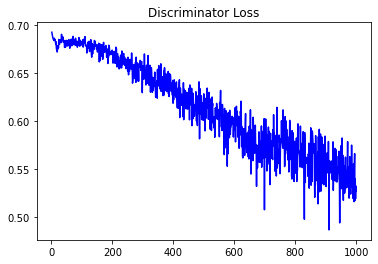

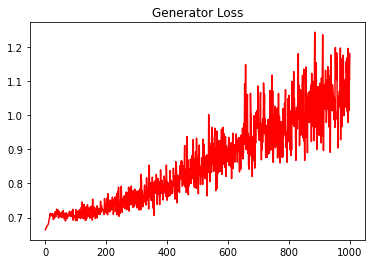

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.3939229450635612


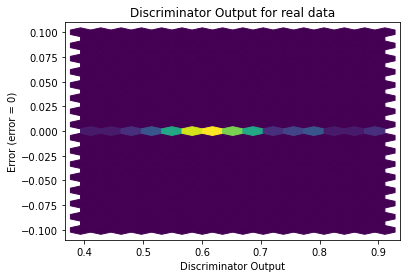

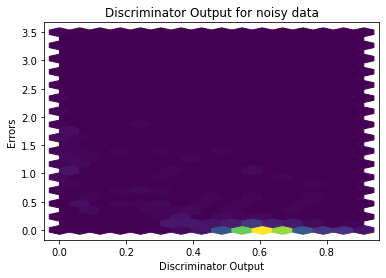

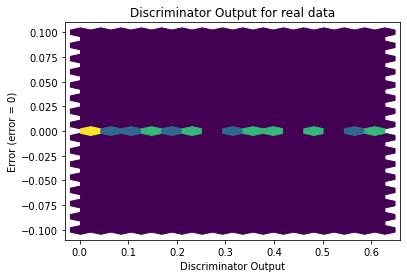

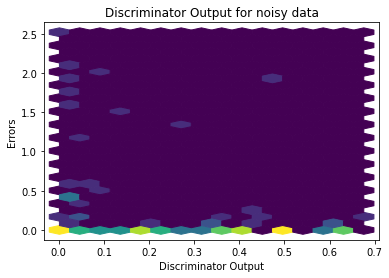

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


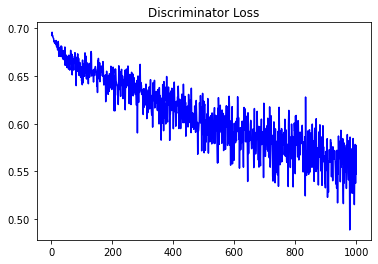

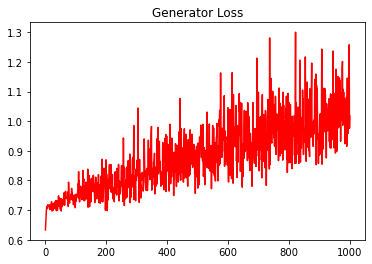

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.46783941957727077


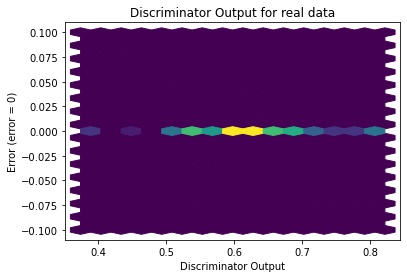

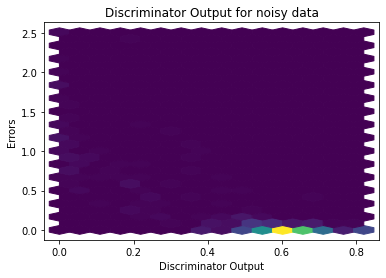

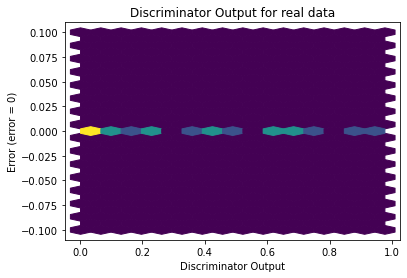

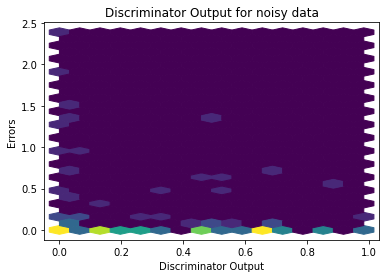

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5526]], requires_grad=True)
